# 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import math
import os

# 2. Read Data

In [2]:
# load the quarterly data (offers and review dates) for the past year. 
offer1 = pd.read_csv(r"31 March, 2023/listings (1).csv", 
                    delimiter = ",")
offer2 = pd.read_csv(r"29 December, 2022/listings (1).csv", 
                    delimiter = ",")
offer3 = pd.read_csv(r"22 September, 2022/listings (1).csv", 
                    delimiter = ",")
offer4 = pd.read_csv(r"24 June, 2022/listings (1).csv", 
                    delimiter = ",")

review1 = pd.read_csv(r"31 March, 2023\reviews (1).csv", 
                      delimiter = ",")
review2 = pd.read_csv(r"29 December, 2022\reviews (1).csv", 
                      delimiter = ",")
review3 = pd.read_csv(r"22 September, 2022\reviews (1).csv", 
                      delimiter = ",")
review4 = pd.read_csv(r"24 June, 2022\reviews (1).csv", 
                      delimiter = ",")

# concatenate the offer and review DataFrames and remove the duplicates based on specific criteria.
offers_frames = [offer1, offer2, offer3, offer4]
offers = pd.concat(offers_frames).drop_duplicates(subset = "id", keep = 'first').reset_index(drop = True)

reviews_frames = [review1, review2, review3, review4]
reviews = pd.concat(reviews_frames).drop_duplicates(keep = 'first').reset_index(drop = True)

In [3]:
offers.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.37374,8.51957,Entire home/apt,100,1125,49,2019-04-27,0.37,1,358,0,NaN
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.35724,8.52304,Entire home/apt,225,3,0,NaN,NaN,1,243,0,NaN
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.36565,8.52753,Private room,60,5,9,2016-05-10,0.06,1,60,0,NaN
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.40656,8.48465,Private room,200,3,0,NaN,NaN,1,364,0,NaN
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.33463,8.54117,Private room,69,2,229,2023-03-13,1.65,1,182,7,NaN


In [4]:
reviews.head(5)

,listing_id,date
0,73282,2012-05-19
1,73282,2012-06-10
2,73282,2012-06-27
3,73282,2012-07-19
4,73282,2012-08-19


# 3. Explore the DataFrame

In [5]:
# show column names
for col_idx, col_name in enumerate(offers.columns):
    print(f"{str(col_idx).rjust(2)})  {col_name}")

 0)  id
 1)  name
 2)  host_id
 3)  host_name
 4)  neighbourhood_group
 5)  neighbourhood
 6)  latitude
 7)  longitude
 8)  room_type
 9)  price
10)  minimum_nights
11)  number_of_reviews
12)  last_review
13)  reviews_per_month
14)  calculated_host_listings_count
15)  availability_365
16)  number_of_reviews_ltm
17)  license


<br>

**Some relevant column explanation**  
<br>
**id** = Airbnb's unique identifier for the listing  
**number_of_reviews** = The number of reviews the listing has  
**number_of_reviews_ltm** = The number of reviews the listing has (in the last 12 months)  
**last_review** = The date of the last/newest review  
**calculated_host_listings_count** = The number of listings the host has in the current scrape, in the city/region geography.  
**reviews_per_month** = The number of reviews the listing has over the lifetime of the listing  
**license** = The licence/permit/registration number  
**last_review** = The date of the last/newest review  
**availability_365** = The availability of the listing in days per year (Note a listing may not be available because it has been booked by a guest or blocked by the host)  
**price** = daily price in local currency (CHF in this case)  
**minimum_nights** = minimum number of night stay for the listing (calendar rules may be different)

In [6]:
offers.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [7]:
offers.isna().any()

id                                False
name                               True
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
number_of_reviews_ltm             False
license                            True
dtype: bool

In [8]:
offers.neighbourhood_group.unique()

array(['Kreis 3', 'Kreis 2', 'Kreis 10', 'Kreis 5', 'Kreis 1', 'Kreis 11',
       'Kreis 4', 'Kreis 7', 'Kreis 6', 'Kreis 12', 'Kreis 8', 'Kreis 9'],
      dtype=object)

In [9]:
offers.neighbourhood.unique()

array(['Sihlfeld', 'Alt-Wiedikon', 'Enge', 'Höngg', 'Wollishofen',
       'Escher Wyss', 'Wipkingen', 'Lindenhof', 'Gewerbeschule',
       'Rathaus', 'Hochschulen', 'Oerlikon', 'Hard', 'Langstrasse',
       'Friesenberg', 'Seebach', 'Hirslanden', 'Unterstrass',
       'Hirzenbach', 'Hottingen', 'Weinegg', 'Oberstrass', 'Mühlebach',
       'Fluntern', 'Albisrieden', 'Seefeld', 'Werd', 'Altstetten',
       'Witikon', 'Affoltern', 'Saatlen', 'City', 'Schwamendingen-Mitte',
       'Leimbach'], dtype=object)

In [10]:
offers.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [11]:
offers[["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"]].describe().applymap('{:.2f}'.format)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3306.00,3306.00,3306.00,3306.00,3306.00,3306.00
mean,172.49,10.95,26.02,10.67,139.14,8.04
std,293.83,55.22,61.85,20.91,133.51,17.23
min,0.00,1.00,0.00,1.00,0.00,0.00
25%,80.00,1.00,1.00,1.00,8.00,0.00
50%,120.00,3.00,4.00,1.00,89.00,1.00
75%,180.00,7.00,21.00,8.00,273.00,7.00
max,9840.00,1125.00,983.00,91.00,365.00,204.00


In [12]:
# convert the neighbourhood_group column to categorical type
categorical_type = CategoricalDtype(categories=['Kreis 1', 'Kreis 2', 'Kreis 3', 'Kreis 4', 'Kreis 5', 'Kreis 6', 
                                                'Kreis 7', 'Kreis 8', 'Kreis 9', 'Kreis 10', 'Kreis 11', 'Kreis 12'], ordered=True)
offers.neighbourhood_group = offers.neighbourhood_group.astype(categorical_type)

offers.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
license                            float64
dtype: object

# 4. Exploratory Data Analysis

## 4.1. Analyze the listings distribution based on the city region (neighbourhood_group)

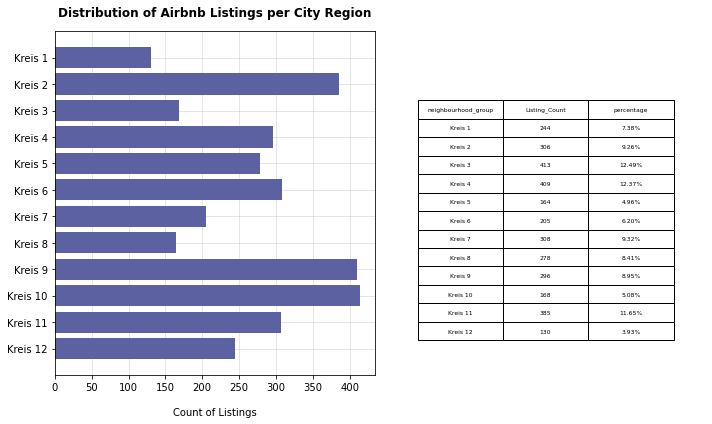

In [13]:
neighbourhood_group_df = offers.groupby("neighbourhood_group")["id"].count().to_frame(name = "Listing_Count").reset_index()
neighbourhood_group_df["percentage"] = neighbourhood_group_df["Listing_Count"].apply(lambda x: x / neighbourhood_group_df["Listing_Count"].sum() * 100).map('{:.2f}%'.format)
                                                                            
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(121)
ax1 = plt.barh(y = neighbourhood_group_df["neighbourhood_group"].sort_values(ascending = False), 
               width = neighbourhood_group_df["Listing_Count"],
               color = "#5B61A1", 
               zorder = 2)
plt.title(label = "Distribution of Airbnb Listings per City Region", fontweight = "bold", pad = 15)
plt.xlabel("Count of Listings", labelpad = 15)
plt.grid(visible = True, alpha = 0.4, zorder = 1)

ax2 = fig.add_subplot(122)
bbox = [0.1, 0.1, 0.8, 0.7]
ax2.table(cellText = neighbourhood_group_df.values, 
          colLabels = neighbourhood_group_df.columns.values,
          cellLoc='center',
          bbox=bbox)
ax2.axis('off')

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()

## 4.2. Analyze the listings distribution based on the neighbourhood

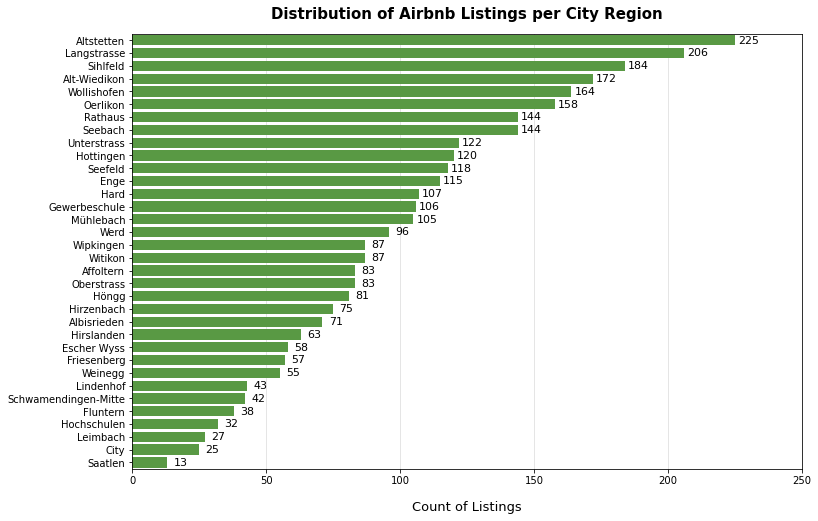

In [14]:
neighbourhood_df = offers.groupby("neighbourhood")["id"].count().to_frame(name = "Listing_Count").reset_index().sort_values(by = "Listing_Count", ascending = True)
neighbourhood_df["percentage"] = neighbourhood_df["Listing_Count"].apply(lambda x: x / neighbourhood_df["Listing_Count"].sum() * 100).map('{:.2f}%'.format)

fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.barplot(data = neighbourhood_df.sort_values(by = "Listing_Count", ascending = False),
                 y = "neighbourhood",
                 x = "Listing_Count",
                 color = "#52A736",
                 zorder = 2)

for rect in ax.patches:
        width = rect.get_width()
        plt.text(5 + rect.get_width(), rect.get_y()+0.5*rect.get_height(),
                 '%d' % int(width),
                 size = 11,
                 ha='center', va='center')
plt.title(label = "Distribution of Airbnb Listings per City Region",
          fontsize = 15, fontweight = "bold", pad = 15)
plt.xlabel("Count of Listings", 
           fontsize = 13, labelpad = 15)
plt.ylabel("")
plt.xlim([0, 250])
plt.grid(visible = True, axis = "x", alpha = 0.4, zorder = 1)
plt.show()

## 4.3. Analyze the listings distribution based on the type of room

In [15]:
room_type_df = offers.groupby("room_type")["id"].count().to_frame(name = "Listing_Count").reset_index().sort_values(by = "Listing_Count", ascending = True)
room_type_df["percentage"] = room_type_df["Listing_Count"].apply(lambda x: x / room_type_df["Listing_Count"].sum() * 100).map('{:.2f}%'.format)
room_type_df

,room_type,Listing_Count,percentage
1,Hotel room,10,0.30%
3,Shared room,23,0.70%
2,Private room,991,29.98%
0,Entire home/apt,2282,69.03%


The majority of rented room types is either an entire home/appartment or a private room. Together they constitute 99% of all listings. Only 1% of the listings are shared rooms of rooms in a hotel.

## 4.4. Analyze the distribution of the availability of the listings over the year

In [16]:
def ininterval(x):    
    if x in pd.Interval(left=0, right=1, closed = "left"):
        return "0-1 d/a"      # category name: unavailable 
    elif x in pd.Interval(left=1, right=30, closed = "left"):
        return "1-30 d/a"     # category name: available 1 - 30 days / year 
    elif x in pd.Interval(left=30, right=90, closed = "left"):
        return "30-90 d/a"    # category name: available 1 to 3 months / year 
    elif x in pd.Interval(left=90, right=180, closed = "left"):
        return "90-180 d/a"   # category name: available 3 to 6 months / year 
    elif x in pd.Interval(left=180, right=270, closed = "left"):
        return "180-270 d/a"  # category name: available 6 to 9 months / year 
    elif x in pd.Interval(left=270, right=365, closed = "left"):
        return "270-365 d/a"  # category name: available 9 to 12 months / year
    else:
        return "365-366 d/a"  # category name: always available 
                                    
offers["availability_365_bins"] = offers["availability_365"].apply(lambda x: ininterval(x))                                
categorical_type = CategoricalDtype(categories=["0-1 d/a", "1-30 d/a", "30-90 d/a", "90-180 d/a", "180-270 d/a", "270-365 d/a", "365-366 d/a"], ordered=True)
offers["availability_365_bins"] = offers["availability_365_bins"].astype(categorical_type)
offers 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_365_bins
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.373740,8.519570,Entire home/apt,100,1125,49,2019-04-27,0.37,1,358,0,NaN,270-365 d/a
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.357240,8.523040,Entire home/apt,225,3,0,NaN,NaN,1,243,0,NaN,180-270 d/a
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.365650,8.527530,Private room,60,5,9,2016-05-10,0.06,1,60,0,NaN,30-90 d/a
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.406560,8.484650,Private room,200,3,0,NaN,NaN,1,364,0,NaN,270-365 d/a
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.334630,8.541170,Private room,69,2,229,2023-03-13,1.65,1,182,7,NaN,180-270 d/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,37646573,Exclusive apartment for 2 above the Zurichsee,27428507,Isabelle,Kreis 8,Weinegg,47.333160,8.573330,Entire home/apt,180,5,10,2022-04-11,0.30,1,53,4,NaN,30-90 d/a
3302,53932959,Wunderschöne Dachwohnung im Herzen von Zollikon,244709639,Angela,Kreis 8,Weinegg,47.337440,8.573800,Entire home/apt,82,3,6,2022-06-05,1.02,1,149,6,NaN,90-180 d/a
3303,816887,Bedroom Overlooling Lake Zürich,1155866,Ysabel,Kreis 7,Witikon,47.336020,8.598810,Private room,79,2,38,2019-08-17,0.36,2,221,0,NaN,180-270 d/a
3304,36905936,cozy apartment near the trainstation,113939451,Sybille,Kreis 9,Altstetten,47.398150,8.443460,Entire home/apt,60,5,2,2021-11-13,0.23,1,30,2,NaN,30-90 d/a


In [17]:
availability_df = offers.groupby("availability_365_bins")["id"].count().to_frame(name = "Listing_Count").reset_index().sort_values(by = "availability_365_bins", ascending = True)
availability_df["percentage"] = availability_df["Listing_Count"].apply(lambda x: x / availability_df["Listing_Count"].sum() * 100).map('{:.2f}%'.format)
availability_df.availability_365_bins = availability_df.availability_365_bins.astype("str")
availability_df

,availability_365_bins,Listing_Count,percentage
0,0-1 d/a,648,19.60%
1,1-30 d/a,466,14.10%
2,30-90 d/a,562,17.00%
3,90-180 d/a,448,13.55%
4,180-270 d/a,326,9.86%
5,270-365 d/a,757,22.90%
6,365-366 d/a,99,2.99%


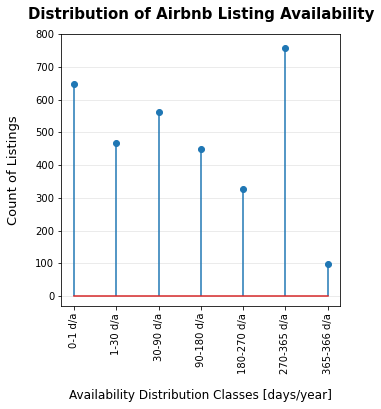

In [18]:
plt.figure(figsize = (5, 5))
plt.stem(availability_df['Listing_Count'])
plt.title("Distribution of Airbnb Listing Availability",
          fontsize = 15, fontweight = "bold", pad = 15)
plt.xlabel("Availability Distribution Classes [days/year]",
           fontsize = 12,
           labelpad = 15)
plt.ylabel("Count of Listings", 
           fontsize = 13, labelpad = 15)
plt.xticks(ticks = range(0, len(availability_df['availability_365_bins'].values)), 
           labels = availability_df['availability_365_bins'].values, 
           rotation = 90)
plt.ylim([-30, 800])
plt.grid(visible = True, 
         axis = "y", 
         alpha = 0.3)
plt.show()

In [19]:
# find percentage of listings for places available between 1 and 270 days/year
print(round(availability_df.iloc[1:5]["Listing_Count"].sum() / availability_df["Listing_Count"].sum() * 100, 2), "%")

54.51 %


The majority of listings have an availability in the 270-365 d/a bin, meaning that the majority of people tend to airbnb their space for 9 to 12 months a year. The bins ranging from 1 to 270 d/a are populated and constitute 54.5 % of the total listings. The interesting thing is that 19.60 % of the listings are not available for bookings. These are listings of people who usually take a break from the airbnb business but still keep the place to get back in the future after some holidays, renovation, etc.

## 4.5. Analyze the distribution of the prices over the listings

In [20]:
# Descriptive Statistics of Price Distribution
offers.price.describe().map('{:.2f}'.format)

count    3306.00
mean      172.49
std       293.83
min         0.00
25%        80.00
50%       120.00
75%       180.00
max      9840.00
Name: price, dtype: object

In [21]:
def ininterval(x):    
    if x in pd.Interval(left=0, right=50, closed = "left"):
        return "0-50 CHF/night"      # category name: very cheap accomodation
    elif x in pd.Interval(left=50, right=100, closed = "left"):
        return "50-100 CHF/night"     # category name: cheap accomodation
    elif x in pd.Interval(left=100, right=150, closed = "left"):
        return "100-150 CHF/night"    # category name: fair price accomodation
    elif x in pd.Interval(left=150, right=200, closed = "left"):
        return "150-200 CHF/night"   # category name: above average price accomodation
    elif x in pd.Interval(left=200, right=500, closed = "left"):
        return "200-500 CHF/night"  # category name: expensive accomodation
    elif x in pd.Interval(left=500, right=1000, closed = "left"):
        return "500-1000 CHF/night"  # category name: very expensive accomodation
    else:
        return "1000+ CHF/night"  # category name: exclusive accomodation
                                    
offers["price_bins"] = offers["price"].apply(lambda x: ininterval(x))                                
categorical_type = CategoricalDtype(categories=["0-50 CHF/night", 
                                                "50-100 CHF/night", 
                                                "100-150 CHF/night", 
                                                "150-200 CHF/night", 
                                                "200-500 CHF/night", 
                                                "500-1000 CHF/night", 
                                                "1000+ CHF/night"], ordered=True)
offers["price_bins"] = offers["price_bins"].astype(categorical_type)
offers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_365_bins,price_bins
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.373740,8.519570,Entire home/apt,100,1125,49,2019-04-27,0.37,1,358,0,NaN,270-365 d/a,100-150 CHF/night
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.357240,8.523040,Entire home/apt,225,3,0,NaN,NaN,1,243,0,NaN,180-270 d/a,200-500 CHF/night
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.365650,8.527530,Private room,60,5,9,2016-05-10,0.06,1,60,0,NaN,30-90 d/a,50-100 CHF/night
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.406560,8.484650,Private room,200,3,0,NaN,NaN,1,364,0,NaN,270-365 d/a,200-500 CHF/night
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.334630,8.541170,Private room,69,2,229,2023-03-13,1.65,1,182,7,NaN,180-270 d/a,50-100 CHF/night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,37646573,Exclusive apartment for 2 above the Zurichsee,27428507,Isabelle,Kreis 8,Weinegg,47.333160,8.573330,Entire home/apt,180,5,10,2022-04-11,0.30,1,53,4,NaN,30-90 d/a,150-200 CHF/night
3302,53932959,Wunderschöne Dachwohnung im Herzen von Zollikon,244709639,Angela,Kreis 8,Weinegg,47.337440,8.573800,Entire home/apt,82,3,6,2022-06-05,1.02,1,149,6,NaN,90-180 d/a,50-100 CHF/night
3303,816887,Bedroom Overlooling Lake Zürich,1155866,Ysabel,Kreis 7,Witikon,47.336020,8.598810,Private room,79,2,38,2019-08-17,0.36,2,221,0,NaN,180-270 d/a,50-100 CHF/night
3304,36905936,cozy apartment near the trainstation,113939451,Sybille,Kreis 9,Altstetten,47.398150,8.443460,Entire home/apt,60,5,2,2021-11-13,0.23,1,30,2,NaN,30-90 d/a,50-100 CHF/night


In [22]:
prices_df = offers.groupby("price_bins")["id"].count().to_frame(name = "Listing_Count").reset_index().sort_values(by = "Listing_Count", ascending = True)
prices_df["percentage"] = prices_df["Listing_Count"].apply(lambda x: x / neighbourhood_df["Listing_Count"].sum() * 100).map('{:.2f}%'.format)
prices_df

,price_bins,Listing_Count,percentage
6,1000+ CHF/night,32,0.97%
5,500-1000 CHF/night,143,4.33%
0,0-50 CHF/night,148,4.48%
4,200-500 CHF/night,503,15.21%
3,150-200 CHF/night,548,16.58%
2,100-150 CHF/night,825,24.95%
1,50-100 CHF/night,1107,33.48%


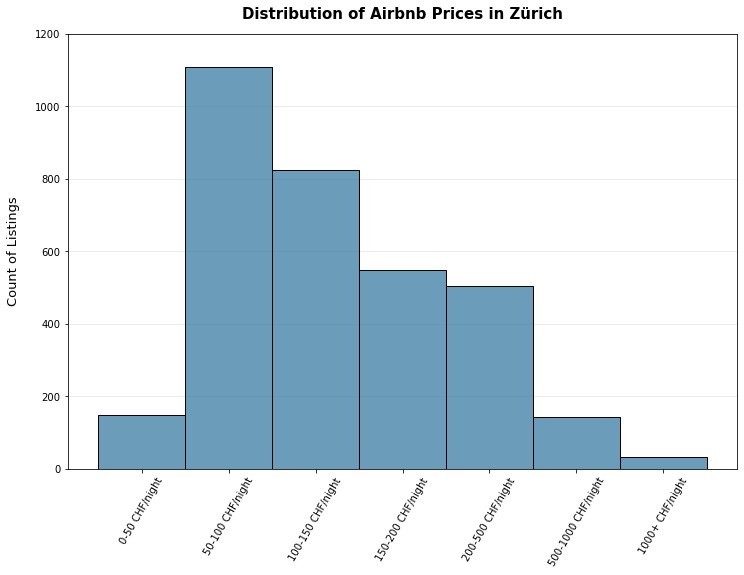

In [23]:
# Plot a histogram to show the distribution of the data with the count on the y-axis
fig, ax = plt.subplots(figsize = (12, 8)) 
sns.histplot(data = offers, x = "price_bins", stat = "count", color = "#3A7CA5", zorder = 3)
plt.title(label = "Distribution of Airbnb Prices in Zürich",
          fontsize = 15, fontweight = "bold", pad = 15)
plt.xlabel("")
plt.ylabel("Count of Listings", 
           fontsize = 13, labelpad = 15)
plt.xticks(rotation = 60)
plt.ylim([0, 1200])
plt.grid(axis = "y", alpha = 0.3, zorder = 1)
plt.show()

In [24]:
# What is the count and percentage of the listing costing 150+ CHF/night
display(prices_df.sort_values(by = "price_bins", ascending = True).iloc[3:])
print(f"\nThe percentage of the listings costing 150+ CHF/a in Zürich is: {round(prices_df.sort_values(by = 'price_bins', ascending = True).iloc[3:]['Listing_Count'].sum() / prices_df['Listing_Count'].sum() * 100, 2)}%\n")

,price_bins,Listing_Count,percentage
3,150-200 CHF/night,548,16.58%
4,200-500 CHF/night,503,15.21%
5,500-1000 CHF/night,143,4.33%
6,1000+ CHF/night,32,0.97%



The percentage of the listings costing 150+ CHF/a in Zürich is: 37.08%



Although the majority of the listings are still in the price range of 50 - 150 CHF/night, as one of the most expensive cities in Europe, Zürich has a lot of Airbnb accomodation of a higher price range of 150+ CHF/night, which consist 37% of the listings.

## 4.6. Analyze the distribution of the listings based on the minimum nights to be booked

In [25]:
offers["minimum_nights"].describe().map('{:.2f}'.format)

count    3306.00
mean       10.95
std        55.22
min         1.00
25%         1.00
50%         3.00
75%         7.00
max      1125.00
Name: minimum_nights, dtype: object

In [26]:
offers["minimum_nights"]

0       1125
1          3
2          5
3          3
4          2
        ... 
3301       5
3302       3
3303       2
3304       5
3305      90
Name: minimum_nights, Length: 3306, dtype: int64

In [27]:
def ininterval_min_stay(x):    
    if x in pd.Interval(left=0, right=2, closed = "left"):
        return "1 night"      # category name: one night stay
    if x in pd.Interval(left=2, right=8, closed = "left"):
        return "2-8 nights"      # category name: short stay
    elif x in pd.Interval(left=8, right=30, closed = "left"):
        return "8-30 nights"     # category name: standard stay
    elif x in pd.Interval(left=30, right=62, closed = "left"):
        return "30-62 nights"    # category name: long stay
    else:
        return "62+ nights"      # category name: extra long stay

offers["min_staying_bins"] = offers["minimum_nights"].apply(lambda x: ininterval_min_stay(x))                                
categorical_type = CategoricalDtype(categories=["1 night", 
                                                "2-8 nights", 
                                                "8-30 nights", 
                                                "30-62 nights", 
                                                "62+ nights"], ordered=True)
offers["min_staying_bins"] = offers["min_staying_bins"].astype(categorical_type)
offers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,availability_365_bins,price_bins,min_staying_bins
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.373740,8.519570,Entire home/apt,100,...,49,2019-04-27,0.37,1,358,0,NaN,270-365 d/a,100-150 CHF/night,62+ nights
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.357240,8.523040,Entire home/apt,225,...,0,NaN,NaN,1,243,0,NaN,180-270 d/a,200-500 CHF/night,2-8 nights
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.365650,8.527530,Private room,60,...,9,2016-05-10,0.06,1,60,0,NaN,30-90 d/a,50-100 CHF/night,2-8 nights
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.406560,8.484650,Private room,200,...,0,NaN,NaN,1,364,0,NaN,270-365 d/a,200-500 CHF/night,2-8 nights
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.334630,8.541170,Private room,69,...,229,2023-03-13,1.65,1,182,7,NaN,180-270 d/a,50-100 CHF/night,2-8 nights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,37646573,Exclusive apartment for 2 above the Zurichsee,27428507,Isabelle,Kreis 8,Weinegg,47.333160,8.573330,Entire home/apt,180,...,10,2022-04-11,0.30,1,53,4,NaN,30-90 d/a,150-200 CHF/night,2-8 nights
3302,53932959,Wunderschöne Dachwohnung im Herzen von Zollikon,244709639,Angela,Kreis 8,Weinegg,47.337440,8.573800,Entire home/apt,82,...,6,2022-06-05,1.02,1,149,6,NaN,90-180 d/a,50-100 CHF/night,2-8 nights
3303,816887,Bedroom Overlooling Lake Zürich,1155866,Ysabel,Kreis 7,Witikon,47.336020,8.598810,Private room,79,...,38,2019-08-17,0.36,2,221,0,NaN,180-270 d/a,50-100 CHF/night,2-8 nights
3304,36905936,cozy apartment near the trainstation,113939451,Sybille,Kreis 9,Altstetten,47.398150,8.443460,Entire home/apt,60,...,2,2021-11-13,0.23,1,30,2,NaN,30-90 d/a,50-100 CHF/night,2-8 nights


In [28]:
min_stay_df = offers.groupby("min_staying_bins")["id"].count().to_frame().reset_index().rename(columns = {"id" : "Listing_Count"})
min_stay_df 

,min_staying_bins,Listing_Count
0,1 night,891
1,2-8 nights,1815
2,8-30 nights,346
3,30-62 nights,198
4,62+ nights,56


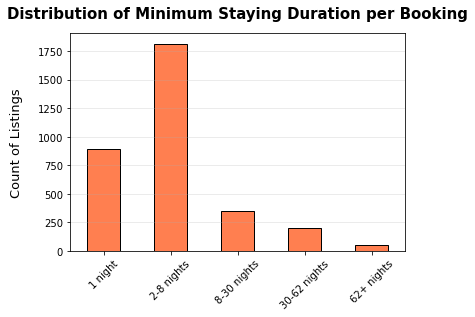

In [29]:
min_stay_df.plot(kind = "bar",
                 x = "min_staying_bins",
                 y = "Listing_Count",
                 color = "coral",
                 edgecolor = "black",
                 legend = False)
plt.title(label = "Distribution of Minimum Staying Duration per Booking",
          fontsize = 15, fontweight = "bold", pad = 15)
plt.xlabel("")
plt.ylabel("Count of Listings", 
           fontsize = 13, labelpad = 15)
plt.xticks(rotation = 45)
plt.grid(axis = "y", alpha = 0.3, zorder = 1)
plt.show()

## 4.7. List the Top 10 hosts with most number of listings

In [30]:
offers.dtypes

id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood_group               category
neighbourhood                       object
latitude                           float64
longitude                          float64
room_type                           object
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
last_review                         object
reviews_per_month                  float64
calculated_host_listings_count       int64
availability_365                     int64
number_of_reviews_ltm                int64
license                            float64
availability_365_bins             category
price_bins                        category
min_staying_bins                  category
dtype: object

In [31]:
series_hosts = offers.groupby("host_id")["host_name"].nunique()  # 3 hosts changed their name in this year
host_name_changed = series_hosts.loc[series_hosts != 1]
display(host_name_changed)

#Let's adjust that to have a consistent overview. The last name is to be kept (maybe the host changed or prefers to be called by this name now)
host_name_changed.index.values

host_id
13570663     2
303096692    2
407449073    2
Name: host_name, dtype: int64

array([ 13570663, 303096692, 407449073], dtype=int64)

In [32]:
host_name_changed.index.values

array([ 13570663, 303096692, 407449073], dtype=int64)

In [33]:
# adjust the data in the DataFrame
for i in range(len(host_name_changed.index.values)): 
    offers.loc[offers.host_id == host_name_changed.index.values[i], "host_name"] = offers.loc[offers.host_id == host_name_changed.index.values[i], "host_name"].iloc[-1]

In [34]:
listings_per_host_df = offers.groupby("host_id").agg({"host_name" : "unique",
                                                      "id" : list,
                                                      "name" : list,
                                                      "neighbourhood" : list, 
                                                      "room_type" : list}).reset_index()
listings_per_host_df = listings_per_host_df.rename(columns = {"id" : "Listings_IDs",
                                                              "name" : "Listings_Names",
                                                              "neighbourhood" : "Listings_Neighbourhood",
                                                              "room_type" : "room_types"}) 
# extract the string representing the host name from the list
listings_per_host_df["host_name"] = listings_per_host_df["host_name"].apply(lambda x: str(x[0]))
listings_per_host_df["Count_Listings"] = listings_per_host_df["Listings_IDs"].apply(lambda x: len(x))
listings_per_host_df = listings_per_host_df.sort_values(by = "Count_Listings", ascending = False)
listings_per_host_df.reset_index(drop = True)
# restructure the order to have a good overview
listings_per_host_df = listings_per_host_df[["host_id", "host_name", "Count_Listings", "Listings_IDs", "Listings_Names", "Listings_Neighbourhood", "room_types"]]
# reset the index starting from 1 to have a good looking classification of hosts
listings_per_host_df.index = np.arange(1, len(listings_per_host_df) + 1)
listings_per_host_df.head(10)

,host_id,host_name,Count_Listings,Listings_IDs,Listings_Names,Listings_Neighbourhood,room_types
1,12886487,Stephanie,91,"[2869056, 2869081, 2869105, 2869130, 2920505, ...","[Letzigrund Jade Apartment, Letzigrund Magenta...","[Altstetten, Altstetten, Altstetten, Altstette...","[Entire home/apt, Entire home/apt, Entire home..."
2,434204093,Blueground,76,"[53966197, 53971360, 53975416, 53975418, 54009...","[Oerlikon 2.5 Room w/ Storage, near Train Stat...","[Oerlikon, Mühlebach, Oerlikon, Oerlikon, Oerl...","[Entire home/apt, Entire home/apt, Entire home..."
3,16703823,Vision AG Neustadtstrasse,70,"[3306566, 4442490, 5541702, 5566299, 5692094, ...","[Studio Apartment Junior, Studio Apartment Jun...","[Alt-Wiedikon, Seebach, Alt-Wiedikon, Seebach,...","[Entire home/apt, Entire home/apt, Entire home..."
4,23561865,Tania,63,"[5055921, 6178739, 6806405, 8658138, 8658898, ...","[3BR city flat near Bellevue! SF6, 2 BR apartm...","[Seefeld, Seefeld, Lindenhof, Mühlebach, Ratha...","[Entire home/apt, Entire home/apt, Entire home..."
5,13570663,Chris,38,"[2668952, 3044226, 3941358, 5072076, 5483148, ...","[Studio mit absoluter Traumaussicht, Best city...","[Rathaus, Mühlebach, Mühlebach, Rathaus, Ratha...","[Entire home/apt, Entire home/apt, Entire home..."
6,58818657,Book A Home AG,37,"[11266276, 13720909, 18355296, 22607990, 22608...","[Easy Studio Apartment, Easy Studio Apartment,...","[Affoltern, Affoltern, Affoltern, Unterstrass,...","[Entire home/apt, Entire home/apt, Entire home..."
7,1229459,Novac Solutions GmbH,35,"[40650157, 40650169, 47168882, 561446612043719...",[Gigantic modern apartment close to ZH main st...,"[Hottingen, Hottingen, Rathaus, Weinegg, Hirsl...","[Entire home/apt, Entire home/apt, Entire home..."
8,25291258,Delta Estates,29,"[14896152, 16185714, 16864720, 16875656, 17032...","[1.5 room apartment in Zurich-City (HG-20), 1....","[Rathaus, Hochschulen, Oerlikon, Oerlikon, Oer...","[Entire home/apt, Entire home/apt, Entire home..."
9,420370006,Kamila,28,"[51899491, 51903755, 52523797, 590431875461610...",[New Studio in the Center of Zurich Old Town11...,"[Rathaus, Unterstrass, Rathaus, Enge, Unterstr...","[Entire home/apt, Entire home/apt, Entire home..."
10,17484617,Marie,26,"[3470221, 3470708, 3483175, 3487718, 4195239, ...","[Studio Penthouse Apartment, Seefeld, 1-bedroo...","[Mühlebach, Mühlebach, Mühlebach, Mühlebach, H...","[Entire home/apt, Entire home/apt, Entire home..."


## 4.8. For the Top 10 hosts show the listings per room type

In [35]:
top_hosts = offers.groupby("host_id")["room_type"].value_counts().reset_index(name = "Listing_Count").pivot_table(index = "host_id", 
                                                                                                                  columns = "room_type", 
                                                                                                                  values = "Listing_Count", aggfunc="sum").fillna(value = 0).astype("int").reset_index()
# remove the index name
top_hosts = top_hosts.rename_axis(None, axis=1)
# add the total listings column (sum of all listings per host)
top_hosts["Total_Listings"] = top_hosts.iloc[: , 1:].sum(axis = 1)
top_hosts = top_hosts.sort_values(by = "Total_Listings", ascending = False).reset_index(drop = True)
# add the host names by merging with the older listings_per_host_df DataFrame
top_hosts = top_hosts.merge(right = listings_per_host_df[["host_id", "host_name"]], 
                            on = "host_id", how = "left")
top_hosts = top_hosts[["host_id", "host_name", "Entire home/apt", "Hotel room", "Private room", "Shared room", "Total_Listings"]]
# reset the index starting from 1 to have a good looking classification of hosts
top_hosts.index = np.arange(1, len(top_hosts) + 1)
top_hosts.head(10)

,host_id,host_name,Entire home/apt,Hotel room,Private room,Shared room,Total_Listings
1,12886487,Stephanie,91,0,0,0,91
2,434204093,Blueground,76,0,0,0,76
3,16703823,Vision AG Neustadtstrasse,70,0,0,0,70
4,23561865,Tania,63,0,0,0,63
5,13570663,Chris,37,0,1,0,38
6,58818657,Book A Home AG,37,0,0,0,37
7,1229459,Novac Solutions GmbH,35,0,0,0,35
8,25291258,Delta Estates,29,0,0,0,29
9,420370006,Kamila,28,0,0,0,28
10,17484617,Marie,25,0,1,0,26


# 5. Profitability Approximation Study

## 5.1 Estimate the number of booked nights per listing 

To be able to estimate the number of booked nights per listing (this information is not provided), the following approach can be used: 

For different type of rooms assign an approximation factor for the amount of nights the person will book. This number can then be multiplicated with the minimum stay indicated in the listing and with the number of reviews for this accommodation which will result in the approximate number of booked nights per listing

In [36]:
def room_stay_approximation(x):
    if x == "Entire home/apt":
        return 1.5          # reason: this option is suitable for tourists who want to enjoy the city and their privacy.
    elif x in ["Private room", "Shared room"]:
        return 2          # reason: this option is suitable and most used by locals and tourists on budget who want to split the place with someone else. The locals tend to stay longe, that is why the factor is higher.
    else: # Hotel room
        return 1.1          # reason: only 10 listings are hotels, which are mostly used by tourists or people having a business trip. These stays are considered to be shorter.

# An other logic will be introduced later which limits the approximation factor to 1 for accomodation requiring a stay longer than 90 days, since it is unlikely to book places for longer on a standard basis.
    
room_type_df["duration_stay_factor"] = room_type_df["room_type"].apply(lambda x: room_stay_approximation(x))
room_type_df

,room_type,Listing_Count,percentage,duration_stay_factor
1,Hotel room,10,0.30%,1.1
3,Shared room,23,0.70%,2.0
2,Private room,991,29.98%,2.0
0,Entire home/apt,2282,69.03%,1.5


In [37]:
reviews.groupby("listing_id")["date"].apply(list).to_frame().reset_index()

,listing_id,date
0,33573,"[2015-04-15, 2015-04-27, 2015-05-01, 2015-05-0..."
1,73282,"[2012-05-19, 2012-06-10, 2012-06-27, 2012-07-1..."
2,86645,"[2011-06-10, 2011-09-25, 2013-03-28, 2013-03-2..."
3,178448,"[2011-08-30, 2011-09-03, 2011-09-10, 2011-10-3..."
4,189891,"[2012-03-15, 2012-04-01, 2012-04-12, 2012-04-2..."
...,...,...
2501,845718725095249437,[2023-03-29]
2502,846336856496218349,[2023-03-23]
2503,847733428086961050,"[2023-03-18, 2023-03-28]"
2504,851880746083177573,[2023-03-29]


In [38]:
offers = offers.merge(right = room_type_df[["room_type", "duration_stay_factor"]], 
                      on = "room_type",
                      how = "left")
offers = offers.merge(right = reviews.groupby("listing_id")["date"].apply(list).to_frame().reset_index(), 
                      left_on = "id",
                      right_on = "listing_id",
                      how = "left").rename(columns = {"date" : "all_review_dates"})

In [39]:
# limit the approximation factor to 1 for accomodation requiring a stay longer than 3 months
offers.loc[offers["minimum_nights"] > 90, "duration_stay_factor"] = 1

In [40]:
# fill NaN values with empty lists in the review dates column
offers["all_review_dates"] = offers["all_review_dates"].fillna("").apply(list)

# There is a problem regarding the minimum nights stayings. Some of them are too high. 
# For this reason, the ones higher than 365 days will be replaced with 3 (median of minimum nights column)
offers.loc[offers["minimum_nights"] > 365, "minimum_nights"] = offers.minimum_nights.median()

# calculate the approximate number of nights booked for the last year for each listing
offers["tot_nights_booked"] = offers["minimum_nights"] * offers["duration_stay_factor"] * offers["all_review_dates"].apply(len)
offers["tot_nights_booked"]  = offers["tot_nights_booked"] .apply(np.ceil)
offers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,availability_365_bins,price_bins,min_staying_bins,duration_stay_factor,listing_id,all_review_dates,tot_nights_booked
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.373740,8.519570,Entire home/apt,100,...,358,0,NaN,270-365 d/a,100-150 CHF/night,62+ nights,1.0,73282.0,"[2012-05-19, 2012-06-10, 2012-06-27, 2012-07-1...",147.0
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.357240,8.523040,Entire home/apt,225,...,243,0,NaN,180-270 d/a,200-500 CHF/night,2-8 nights,1.5,NaN,[],0.0
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.365650,8.527530,Private room,60,...,60,0,NaN,30-90 d/a,50-100 CHF/night,2-8 nights,2.0,178448.0,"[2011-08-30, 2011-09-03, 2011-09-10, 2011-10-3...",90.0
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.406560,8.484650,Private room,200,...,364,0,NaN,270-365 d/a,200-500 CHF/night,2-8 nights,2.0,NaN,[],0.0
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.334630,8.541170,Private room,69,...,182,7,NaN,180-270 d/a,50-100 CHF/night,2-8 nights,2.0,222565.0,"[2011-11-03, 2012-03-09, 2012-04-03, 2012-06-0...",916.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,37646573,Exclusive apartment for 2 above the Zurichsee,27428507,Isabelle,Kreis 8,Weinegg,47.333160,8.573330,Entire home/apt,180,...,53,4,NaN,30-90 d/a,150-200 CHF/night,2-8 nights,1.5,37646573.0,"[2019-09-30, 2019-12-28, 2020-01-01, 2020-08-0...",75.0
3302,53932959,Wunderschöne Dachwohnung im Herzen von Zollikon,244709639,Angela,Kreis 8,Weinegg,47.337440,8.573800,Entire home/apt,82,...,149,6,NaN,90-180 d/a,50-100 CHF/night,2-8 nights,1.5,53932959.0,"[2021-12-31, 2022-01-21, 2022-02-14, 2022-04-0...",27.0
3303,816887,Bedroom Overlooling Lake Zürich,1155866,Ysabel,Kreis 7,Witikon,47.336020,8.598810,Private room,79,...,221,0,NaN,180-270 d/a,50-100 CHF/night,2-8 nights,2.0,816887.0,"[2013-11-04, 2013-12-08, 2014-06-02, 2014-06-2...",152.0
3304,36905936,cozy apartment near the trainstation,113939451,Sybille,Kreis 9,Altstetten,47.398150,8.443460,Entire home/apt,60,...,30,2,NaN,30-90 d/a,50-100 CHF/night,2-8 nights,1.5,36905936.0,"[2021-10-11, 2021-11-13]",15.0


## 5.2. Estimate the total revenue per listing 

To estimate the revenue per listing, multiply the approximate booked nights per listing by the listing price.

In [41]:
offers["tot_revenue_per_listing"] = offers["price"] * offers["tot_nights_booked"]
offers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews_ltm,license,availability_365_bins,price_bins,min_staying_bins,duration_stay_factor,listing_id,all_review_dates,tot_nights_booked,tot_revenue_per_listing
0,73282,"Clean, central, quiet",377532,Simona,Kreis 3,Sihlfeld,47.373740,8.519570,Entire home/apt,100,...,0,NaN,270-365 d/a,100-150 CHF/night,62+ nights,1.0,73282.0,"[2012-05-19, 2012-06-10, 2012-06-27, 2012-07-1...",147.0,14700.0
1,143821,LOFT on 2 floors in Sihlcity Zürich,697307,Erhan,Kreis 3,Alt-Wiedikon,47.357240,8.523040,Entire home/apt,225,...,0,NaN,180-270 d/a,200-500 CHF/night,2-8 nights,1.5,NaN,[],0.0,0.0
2,178448,"a lovely place, top location",854016,Delphine,Kreis 2,Enge,47.365650,8.527530,Private room,60,...,0,NaN,30-90 d/a,50-100 CHF/night,2-8 nights,2.0,178448.0,"[2011-08-30, 2011-09-03, 2011-09-10, 2011-10-3...",90.0,5400.0
3,204586,very nice luxury city apartment,1004816,Aicha,Kreis 10,Höngg,47.406560,8.484650,Private room,200,...,0,NaN,270-365 d/a,200-500 CHF/night,2-8 nights,2.0,NaN,[],0.0,0.0
4,222565,Bedroom overlooking the lake near,1155866,Ysabel,Kreis 2,Wollishofen,47.334630,8.541170,Private room,69,...,7,NaN,180-270 d/a,50-100 CHF/night,2-8 nights,2.0,222565.0,"[2011-11-03, 2012-03-09, 2012-04-03, 2012-06-0...",916.0,63204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,37646573,Exclusive apartment for 2 above the Zurichsee,27428507,Isabelle,Kreis 8,Weinegg,47.333160,8.573330,Entire home/apt,180,...,4,NaN,30-90 d/a,150-200 CHF/night,2-8 nights,1.5,37646573.0,"[2019-09-30, 2019-12-28, 2020-01-01, 2020-08-0...",75.0,13500.0
3302,53932959,Wunderschöne Dachwohnung im Herzen von Zollikon,244709639,Angela,Kreis 8,Weinegg,47.337440,8.573800,Entire home/apt,82,...,6,NaN,90-180 d/a,50-100 CHF/night,2-8 nights,1.5,53932959.0,"[2021-12-31, 2022-01-21, 2022-02-14, 2022-04-0...",27.0,2214.0
3303,816887,Bedroom Overlooling Lake Zürich,1155866,Ysabel,Kreis 7,Witikon,47.336020,8.598810,Private room,79,...,0,NaN,180-270 d/a,50-100 CHF/night,2-8 nights,2.0,816887.0,"[2013-11-04, 2013-12-08, 2014-06-02, 2014-06-2...",152.0,12008.0
3304,36905936,cozy apartment near the trainstation,113939451,Sybille,Kreis 9,Altstetten,47.398150,8.443460,Entire home/apt,60,...,2,NaN,30-90 d/a,50-100 CHF/night,2-8 nights,1.5,36905936.0,"[2021-10-11, 2021-11-13]",15.0,900.0


## 5.3. Estimate the revenue per host. Show Top 10

To estimate the revenue registered by each host, group by host ID and sum up the revenue per listing in property of each host.

In [42]:
highest_revenues_df = offers.groupby("host_id").agg({"host_name" : list,
                                                     "id" : "count",
                                                     "tot_revenue_per_listing" : sum,
                                                     "tot_nights_booked" : sum}).rename(columns = {"id" : "Count_Listings"}).reset_index()
highest_revenues_df.host_name = highest_revenues_df.host_name.apply(lambda x: x[0])
highest_revenues_df.sort_values(by = "tot_revenue_per_listing", ascending = False, inplace = True)
highest_revenues_df.index = np.arange(1, len(highest_revenues_df) + 1)
highest_revenues_df = highest_revenues_df[["host_id", "host_name", "Count_Listings", "tot_nights_booked", "tot_revenue_per_listing"]]
highest_revenues_df.head(10)

,host_id,host_name,Count_Listings,tot_nights_booked,tot_revenue_per_listing
1,18715465,Joy,11,21869.0,3748812.0
2,13570663,Chris,38,28006.0,3023755.0
3,23561865,Tania,63,17304.0,2947323.0
4,34541936,Strahinja,7,10471.0,1781644.0
5,10379615,Josh,2,15660.0,980400.0
6,13559803,Djoullel,1,11745.0,927855.0
7,3528377,Marc,16,3984.0,869752.0
8,68462821,Vincenzo,1,4000.0,796000.0
9,12886487,Stephanie,91,1370.0,787750.0
10,19610180,Rossana,16,13024.0,724053.0
